In [14]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import serial
import time
import numpy as np

train_dataset_path = r"/home/joe/Indvidual Project/data new/Train"
test_dataset_path = r"/home/joe/Indvidual Project/data new/Test"

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a global average pooling layer
x = GlobalAveragePooling2D()(base_model.output)

# Add a fully connected layer
x = Dense(1024, activation='relu')(x)

# Add a classification layer with 2 labels 
predictions = Dense(2, activation='softmax')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (224, 224)

# Define data generators
train_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    validation_split=0.2,
    label_mode="categorical",
    subset="training",
    seed=43,
    image_size=image_size,
    batch_size=64
)

validation_generator = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_path,
    validation_split=0.2,
    label_mode="categorical",
    subset="validation",
    seed=43,
    image_size=image_size,
    batch_size=64
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_3[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

2024-03-30 08:01:36.091607: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 72000000 exceeds 10% of free system memory.
2024-03-30 08:01:36.224851: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 55503648 exceeds 10% of free system memory.
2024-03-30 08:01:36.313727: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 48254976 exceeds 10% of free system memory.
2024-03-30 08:01:36.341171: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.
2024-03-30 08:01:36.345842: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38535168 exceeds 10% of free system memory.


3/3 [==============================] - 8s 2s/step - loss: 13.7203 - accuracy: 0.4848 - val_loss: 53.8789 - val_accuracy: 0.4688
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 38.5775 - accuracy: 0.5455 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.6620 - val_accuracy: 0.9688
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.6544 - accuracy: 0.9773 - val_loss: 3.8073 - val_accuracy: 0.9688
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.5097 - accuracy: 0.9924 - val_loss: 3.7438 - val_accuracy: 0.9688
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.0119 - accuracy: 0.9924 - val_loss: 3.0430 - val_accuracy: 0.9688
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 2.1080 - val_accuracy: 0.9688
Epoch 8/10
3/3 [=====================

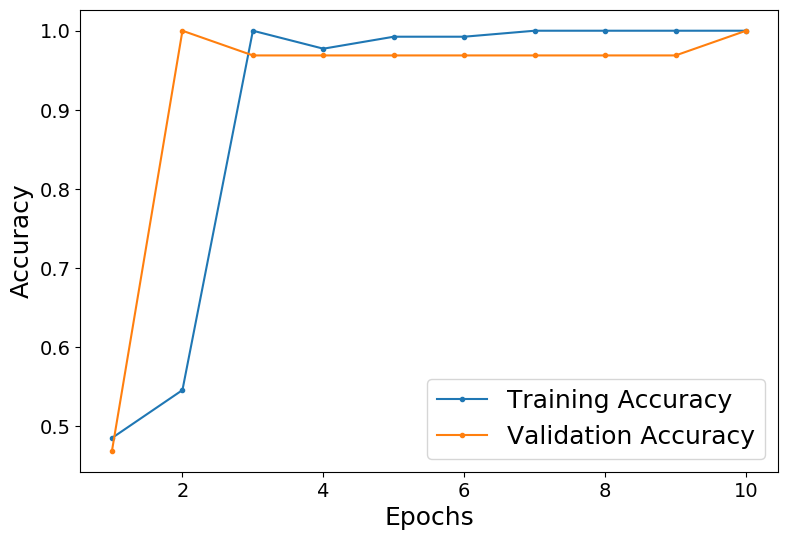

In [15]:
# Extract the loss values from the history
import matplotlib.pylab as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

params = {
   'axes.labelsize': 18,
   'font.size': 18,
   'legend.fontsize': 18,
   'xtick.labelsize': 14,
   'ytick.labelsize': 14,
   'text.usetex': False,
   'figure.figsize': [9, 6]
   }
plt.rcParams.update(params)


# Create a plot to visualize the training and validation loss
#plt.figure(figsize=(5, 3))
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', marker='.')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', marker='.')
#plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)

In [18]:
import cv2
import os
import time

def capture_and_save_image(folder_path):
    # Create the folder if it doesn't exist
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)

    # Open the default camera (usually 0)
    cap = cv2.VideoCapture(0)

    # Check if the camera is opened successfully
    if not cap.isOpened():
        print("Error: Unable to open camera")
        return

    # Allow the camera to adjust to the lighting conditions (1-second delay)
    time.sleep(1)

    # Capture frame-by-frame
    ret, frame = cap.read()

    # Display the captured frame
    cv2.imshow('Captured Image', frame)
    
    # Save the image to the specified folder path
    image_path = os.path.join(folder_path, 'captured_image.jpg')
    cv2.imwrite(image_path, frame)
    
    print("Image saved successfully at:", image_path)

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

# Specify the folder path where the image will be saved
folder_path = r"/home/joe/Indvidual Project/data new/Test"

# Call the function to capture and save the image
capture_and_save_image(folder_path)


Image saved successfully at: /home/joe/Indvidual Project/data new/Test/captured_image.jpg


In [19]:
test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_path,
    labels = None,
    color_mode='rgb',
    label_mode="categorical",
    shuffle=False,
    image_size=image_size,
    )

Found 1 files belonging to 1 classes.


In [20]:
result= model.predict(test_images)
print(result)

1/1 [==============================] - 0s 499ms/step
[[1.000000e+00 6.407021e-24]]


In [ ]:

if (result[0][0] >= 0.7) and  (result[0][1] <= 0.5) :
    SerialObj.write(b'1')
elif (result[0][1] >= 0.7) and  (result[0][0] <= 0.5):
    SerialObj.write(b'2')
       